## import packages

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

## downland data 

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')  
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats')  
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

68608000/68606236 [==============================] - 0s 0us/step


In [3]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)
print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
Total training images: 2000
Total validation images: 1000


## data generator and data augmentation

In [4]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                            rotation_range = 40,
                                            width_shift_range = 0.2,
                                            height_shift_range = 0.2,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            horizontal_flip = True,)  
train_data_gen = train_image_generator.flow_from_directory(batch_size = 100,
                                                           directory = train_dir,
                                                           target_size = (150,150), 
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [5]:
validation_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = validation_image_generator.flow_from_directory(batch_size = 100,
                                                              directory = validation_dir,
                                                              target_size = (150,150), 
                                                              class_mode = 'binary')

Found 1000 images belonging to 2 classes.


## my model

In [6]:
from keras import layers, models
CD = models.Sequential()
CD.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
CD.add(layers.MaxPooling2D(2,2))

CD.add(layers.Conv2D(64, (3,3), activation='relu'))
CD.add(layers.Conv2D(64, (3,3), activation='relu'))
CD.add(layers.MaxPooling2D(2,2))

CD.add(layers.Conv2D(128, (3,3), activation = 'relu'))
CD.add(layers.Conv2D(128, (3,3), activation = 'relu'))
CD.add(layers.MaxPooling2D(2,2))

CD.add(layers.Conv2D(128, (3,3), activation = 'relu'))
CD.add(layers.Conv2D(128, (3,3), activation = 'relu'))
CD.add(layers.MaxPooling2D(2,2))

CD.add(layers.Flatten())

CD.add(layers.Dense(512, activation = 'relu'))
CD.add(layers.Dense(1, activation = 'sigmoid'))

CD.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

CD.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 128)       1

## model training

In [7]:
EPOCHS = 100
BATCH_SIZE = 100
history = CD.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
20/20 [==============================] - 24s 813ms/step - loss: 1.0479 - accuracy: 0.5144 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 16s 807ms/step - loss: 0.6940 - accuracy: 0.4920 - val_loss: 0.6924 - val_accuracy: 0.4990
Epoch 3/100
20/20 [==============================] - 16s 808ms/step - loss: 0.6980 - accuracy: 0.5136 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
20/20 [==============================] - 16s 811ms/step - loss: 0.6938 - accuracy: 0.5197 - val_loss: 0.6923 - val_accuracy: 0.5080
Epoch 5/100
20/20 [==============================] - 16s 807ms/step - loss: 0.6933 - accuracy: 0.5191 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 6/100
20/20 [==============================] - 16s 819ms/step - loss: 1.2232 - accuracy: 0.5160 - val_loss: 0.6882 - val_accuracy: 0.5360
Epoch 7/100
20/20 [==============================] - 16s 801ms/step - loss: 0.6872 - accuracy: 0.5668 - val_loss: 0.6860 - val_accuracy:

## visualizing results of the training

<function matplotlib.pyplot.show>

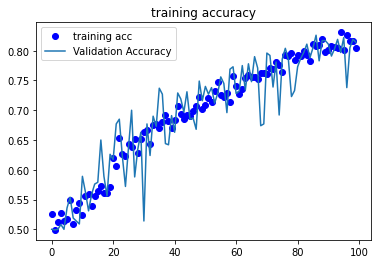

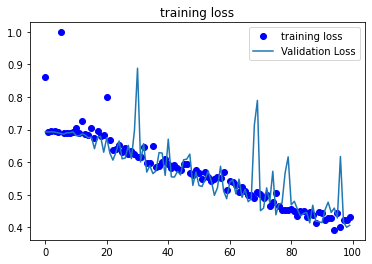

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(EPOCHS)

plt.plot(epochs, acc, 'bo', label = 'training acc')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('training loss')
plt.legend()

plt.show